# Очистка данных. Практическая работа

## Цель практической работы

- Научиться выполнять очистку и подготовку данных для их дальнейшего использования в задаче машинного обучения.

## Что нужно сделать

- Загрузить данные в ноутбук.
- Провести разведочный анализ данных.
- Разделить данные на обучающую и тестовую выборки.
- Выполнить очистку и подготовку данных.

## Что оценивается 

1. Выполнены все этапы задания.
1. Не допущены утечки данных.

## Формат сдачи

Выполните предложенные задания: впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [161]:
### YOUR CODE HERE ###
import pandas as pd
df = pd.read_csv('12.5 Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


In [162]:
# Удалим столбец CustomerID, т.к. он не является информативным
df.drop(columns=['CustomerID'], inplace=True)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19.0,15.0,39
1,Male,NaN,NaN,81
2,Female,NaN,16.0,6
3,Female,23.0,16.0,77
4,Female,31.0,17.0,40


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [163]:
### YOUR CODE HERE ###
# Посчитаем кол-во пропусков на каждом признаке
df.isna().sum() 

Genre                     19
Age                       20
Annual Income (k$)        20
Spending Score (1-100)     0
dtype: int64

Histogram for Genre


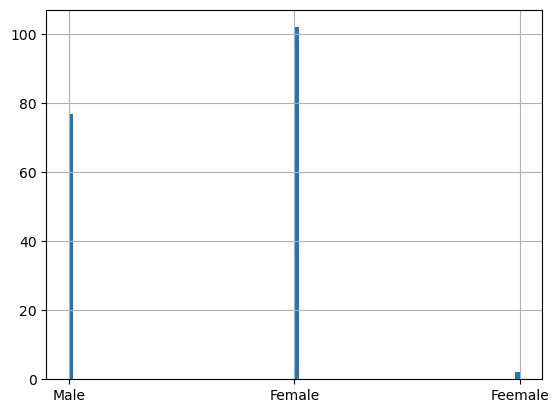

Histogram for Age


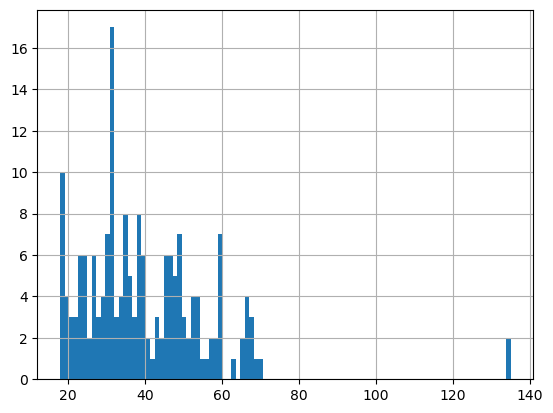

Histogram for Annual Income (k$)


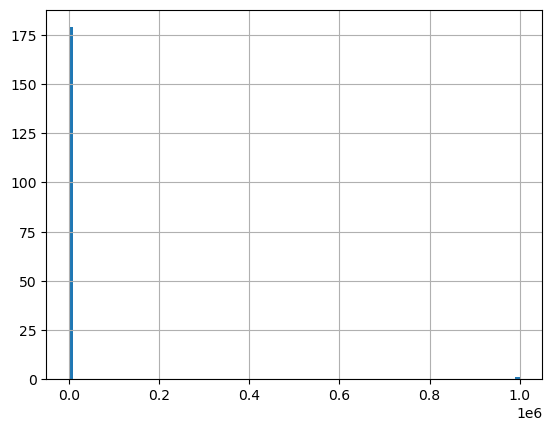

Histogram for Spending Score (1-100)


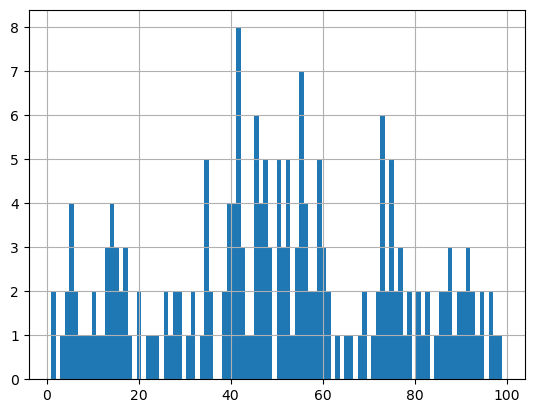

In [164]:
# Посмотрим на распределения признаков
import matplotlib.pyplot as plt

for col in df.columns:
    print(f'Histogram for {col}')
    df[col].hist(bins=100)
    plt.show()

In [165]:
# Для численных переменных найдем есть ли аномальные значения
def calculate_outliers(data, column):
    q25 = data[column].quantile(0.25)
    q75 = data[column].quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)

    return boundaries
for i in df.describe().columns:
    out = calculate_outliers(df, i)
    anomaly_count = len(df[(df[i] > out[1]) | (df[i] < out[0])])
    print (f'Количество аномалий в столбце {i}: {anomaly_count}')

Количество аномалий в столбце Age: 2
Количество аномалий в столбце Annual Income (k$): 3
Количество аномалий в столбце Spending Score (1-100): 0


В датасете аномалий немного, но достачно много(около 7%) пропусков по каждому признаку. Дополнительно можно заметить, что в столбце Genre для некотрых значений явно присутствует орфографическая ошибка 'Feemale', заменим это значение на 'Female'

Histogram for Genre


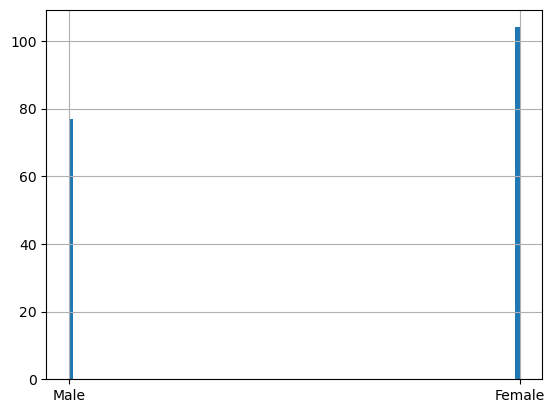

In [166]:
df.replace('Feemale', 'Female', inplace=True)
print('Histogram for Genre')
df['Genre'].hist(bins=100)
plt.show()

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [167]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
random_state = 1

X_train, X_test = train_test_split(df, test_size=0.2, random_state=random_state)

### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [168]:
### YOUR CODE HERE ###


#### Колонка Genre 

In [169]:
# Посмотрим на медианные значения других параметров в зависимости от колонки Genre
X_train.groupby(by=['Genre']).median()

,Age,Annual Income (k$),Spending Score (1-100)
Genre,,,
Female,34.0,62.5,53.5
Male,38.0,60.0,49.0


In [170]:
# Посмотрим на пропущенные значения
X_train[X_train.Genre.isna()]

,Genre,Age,Annual Income (k$),Spending Score (1-100)
56,NaN,51.0,44.0,50
185,NaN,30.0,99.0,97
123,NaN,39.0,NaN,91
106,NaN,NaN,63.0,50
199,NaN,30.0,137.0,83
54,NaN,50.0,NaN,45
84,NaN,21.0,54.0,57
154,NaN,47.0,78.0,16
6,NaN,135.0,18.0,6
32,NaN,53.0,33.0,4


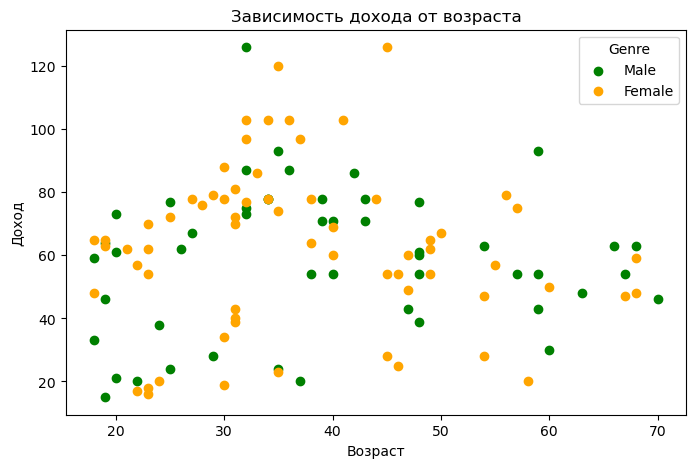

In [171]:
# Построим диаграмму рассеяния для возраста и дохода. Без учета выбросов. 
# Раскрасим каждую точку согласно пола.
out1 = calculate_outliers(X_train, 'Annual Income (k$)')
out2 = calculate_outliers(X_train, 'Age')
df_in = X_train[(X_train['Annual Income (k$)'] <= out1[1]) & (X_train['Age'] <= out2[1])]
colors = {'Male': 'green', 'Female': 'orange'}
fig, ax = plt.subplots(figsize=(8, 5))
for genre in colors:
    color = colors[genre]
    data = df_in[df_in['Genre'] == genre]

    ax.scatter(data['Age'], data['Annual Income (k$)'], c=color, label=genre)

ax.legend(loc='upper right', title="Genre")
plt.title("Зависимость дохода от возраста")
plt.xlabel('Возраст')
plt.ylabel('Доход')
plt.show()

In [172]:
# Посмотрим есть ли строки в которых пропущено более половины значений признаков
X_train_miss_row = X_train[X_train.isna().sum(axis=1) >= 2]
X_train_miss_row

,Genre,Age,Annual Income (k$),Spending Score (1-100)
123,NaN,39.0,NaN,91
106,NaN,NaN,63.0,50
54,NaN,50.0,NaN,45
46,Female,NaN,NaN,55
1,Male,NaN,NaN,81


In [173]:
# Такие строки неинформативны. Удалим их 
X_train = X_train[X_train.isna().sum(axis=1) < 2]

In [174]:
# Посмотрим на процент оставшихся пропусков
X_train.Age.isna().sum() * 100 / X_train.shape[0]

7.741935483870968

In [175]:
# Т.к. особых связей переменной Age с другими переменными не было выявлено, а также потому что кол-во пропусков достаточно 
# велико заменим пропуски на значение 'Unknown'
from sklearn.impute import SimpleImputer

imp_const_unknown = SimpleImputer(strategy='constant', fill_value='unknown')

unk_cols = ['Genre']

X_train[unk_cols] = imp_const_unknown.fit_transform(X_train[unk_cols])
X_train.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
108,Male,68.0,63.0,43
107,Male,54.0,63.0,46
189,Female,36.0,103.0,85
14,Male,37.0,20.0,13
56,unknown,51.0,44.0,50


#### Колонки Age и Annual Income (k$)

In [176]:
# Пропуски в колонках Age и Annual Income (k$) заполним медианным значением, т.к. в колонках есть аномальные значения
imp_median = SimpleImputer(strategy='median')

med_cols = ['Age', 'Annual Income (k$)']

X_train[med_cols] = imp_median.fit_transform(X_train[med_cols])
X_train.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
108,Male,68.0,63.0,43
107,Male,54.0,63.0,46
189,Female,36.0,103.0,85
14,Male,37.0,20.0,13
56,unknown,51.0,44.0,50


### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


In [177]:
### YOUR CODE HERE ###
# Посмотрим на аномальные значения более подробно
out = calculate_outliers(X_train, 'Age')
X_train[(X_train.Age > out[1]) | (X_train.Age < out[0])]

,Genre,Age,Annual Income (k$),Spending Score (1-100)
6,unknown,135.0,18.0,6
8,Male,135.0,19.0,3


In [178]:
X_train.Age.median()

36.0

In [179]:
# В аномальных значениях возраста видимо допущена опечатка и возраст скорее всего равен 35, это близко к медианному значению
# поэтому на него и поменяем
X_train.loc[(X_train['Age'] > out[1]), 'Age'] = X_train.Age.median()
X_train

,Genre,Age,Annual Income (k$),Spending Score (1-100)
108,Male,68.0,63.0,43
107,Male,54.0,63.0,46
189,Female,36.0,103.0,85
14,Male,37.0,20.0,13
56,unknown,51.0,44.0,50
...,...,...,...,...
133,Female,31.0,72.0,71
137,Male,32.0,73.0,73
72,Female,60.0,50.0,49
140,Female,57.0,75.0,5


In [180]:
out = calculate_outliers(X_train, 'Annual Income (k$)')
X_train[(X_train['Annual Income (k$)'] > out[1]) | (X_train['Annual Income (k$)'] < out[0])]

,Genre,Age,Annual Income (k$),Spending Score (1-100)
199,unknown,30.0,137.0,83
195,Female,35.0,120.0,79
197,Male,32.0,126.0,74
196,Female,45.0,126.0,28
156,Male,37.0,1000000.0,1


In [181]:
# аномальным выглядит только одно значение, удалим его и посмортим на распределение

Histogram for Annual Income (k$)


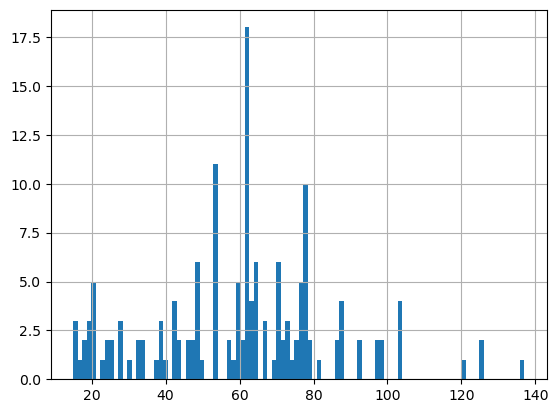

In [182]:
X_train = X_train[X_train['Annual Income (k$)'] < 10000]
print(f'Histogram for Annual Income (k$)')
X_train['Annual Income (k$)'].hist(bins=100)
plt.show()

In [183]:
# Распределение похоже на нормальное, так и оставляем

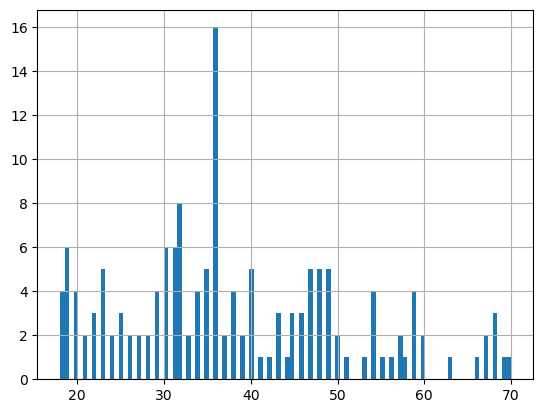

In [184]:
X_train['Age'].hist(bins=100)
plt.show()

### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


In [185]:
### YOUR CODE HERE ###
# Т.к. распределение численных признаков похоже на нормальное применим стандартизацию. После стандартизации удалим столбцы
# с исходными данными
from sklearn.preprocessing import StandardScaler

counts = ['Age', 'Annual Income (k$)']
data1 = X_train[counts]
std_scaler = StandardScaler()
std_scaler.fit(data1)
std_scaled = std_scaler.transform(data1)
counts_new = [f'{el}_std' for el in counts]
X_train[counts_new] = std_scaled
X_train.drop(columns=counts, inplace=True)
X_train.head()

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_20816\3903588210.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[counts_new] = std_scaled
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_20816\3903588210.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[counts_new] = std_scaled
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_20816\3903588210.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

,Genre,Spending Score (1-100),Age_std,Annual Income (k$)_std
108,Male,43,2.266202,0.121103
107,Male,46,1.201497,0.121103
189,Female,85,-0.167410,1.778869
14,Male,13,-0.091359,-1.660995
56,unknown,50,0.973346,-0.666336


### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [186]:
X_train

,Genre,Spending Score (1-100),Age_std,Annual Income (k$)_std
108,Male,43,2.266202,0.121103
107,Male,46,1.201497,0.121103
189,Female,85,-0.167410,1.778869
14,Male,13,-0.091359,-1.660995
56,unknown,50,0.973346,-0.666336
...,...,...,...,...
133,Female,71,-0.547661,0.494100
137,Male,73,-0.471611,0.535545
72,Female,49,1.657799,-0.417671
140,Female,5,1.429648,0.618433


In [187]:
### YOUR CODE HERE ###
# Для кодировки буду использовать OneHotEncoder, т.к. у нас три возможных значения
from sklearn.preprocessing import OneHotEncoder
category = ['Genre']
data2 = X_train[category]
ohe = OneHotEncoder(sparse=False, drop='first')
ft = ohe.fit_transform(data2)
ohe_category = ohe.transform(data2)
X_train[ohe.get_feature_names()] = ohe_category
X_train

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_20816\3781569954.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[ohe.get_feature_names()] = ohe_category
C:\Users\Msi-1\AppData\Local\Temp\ipykernel_20816\3781569954.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

,Genre,Spending Score (1-100),Age_std,Annual Income (k$)_std,x0_Male,x0_unknown
108,Male,43,2.266202,0.121103,1.0,0.0
107,Male,46,1.201497,0.121103,1.0,0.0
189,Female,85,-0.167410,1.778869,0.0,0.0
14,Male,13,-0.091359,-1.660995,1.0,0.0
56,unknown,50,0.973346,-0.666336,0.0,1.0
...,...,...,...,...,...,...
133,Female,71,-0.547661,0.494100,0.0,0.0
137,Male,73,-0.471611,0.535545,1.0,0.0
72,Female,49,1.657799,-0.417671,0.0,0.0
140,Female,5,1.429648,0.618433,0.0,0.0


In [188]:
# Удалим лишний столбец
X_train.drop(columns=['Genre'], inplace=True)
X_train

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_20816\42532414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=['Genre'], inplace=True)


,Spending Score (1-100),Age_std,Annual Income (k$)_std,x0_Male,x0_unknown
108,43,2.266202,0.121103,1.0,0.0
107,46,1.201497,0.121103,1.0,0.0
189,85,-0.167410,1.778869,0.0,0.0
14,13,-0.091359,-1.660995,1.0,0.0
56,50,0.973346,-0.666336,0.0,1.0
...,...,...,...,...,...
133,71,-0.547661,0.494100,0.0,0.0
137,73,-0.471611,0.535545,1.0,0.0
72,49,1.657799,-0.417671,0.0,0.0
140,5,1.429648,0.618433,0.0,0.0


### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [189]:
### YOUR CODE HERE ###
X_test = X_test[X_test.isna().sum(axis=1) < 2]

X_test[unk_cols] = imp_const_unknown.transform(X_test[unk_cols])

X_test[med_cols] = imp_median.transform(X_test[med_cols])

out = calculate_outliers(X_test, 'Age')
X_test.loc[(X_test['Age'] > out[1]), 'Age'] = X_test.Age.median()

X_test = X_test[X_test['Annual Income (k$)'] < 10000]

data1 = X_test[counts]

std_scaled = std_scaler.transform(data1)
counts_new = [f'{el}_std' for el in counts]
X_test[counts_new] = std_scaled
X_test.drop(columns=counts, inplace=True)

data2 = X_test[category]


ohe_category = ohe.transform(data2)
X_test[ohe.get_feature_names()] = ohe_category
X_test.drop(columns=['Genre'], inplace=True)
X_test

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Spending Score (1-100),Age_std,Annual Income (k$)_std,x0_Male,x0_unknown
58,51,-0.851863,-0.583448,0.0,0.0
40,35,2.038051,-0.915001,0.0,0.0
34,14,0.821245,-1.122222,0.0,0.0
102,59,2.190151,0.079659,1.0,0.0
184,39,0.212842,1.613093,0.0,0.0
198,18,-0.167410,3.187970,1.0,0.0
95,52,-1.080014,-0.003229,0.0,1.0
4,40,-0.547661,-1.785328,0.0,0.0
29,87,-1.156064,-1.287998,0.0,0.0
168,27,-0.167410,1.115763,0.0,0.0
